In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df = pd.read_csv('dataset/cars.csv')

# We'll be predicting price based on horsepower
X = df[['engine_cc']]  # Feature
y = df['price_usd']     # Target

print(f"\nDataset size: {len(df)} samples")


Dataset size: 300 samples


In [107]:
# Feature scaling

X = X/max(X['eng'])
X = X.values.flatten()

y = y/max(y)
# y = y.values.flatten()
y = y.values.reshape(-1, 1)


In [108]:
# Adding 1's column to X so that we can do matrix multiplication, this will basically represent the variable attached with the intercept
# y = mx + cz (z=1 here, and that is what this column will be)

n_rows = len(y)
X = np.c_[np.ones(n_rows), X]
print(X)

# This will hold our final thetas, intercept and slope
theta = np.zeros((2, 1))

[[1.         0.91318865]
 [1.         0.278798  ]
 [1.         0.1836394 ]
 [1.         0.62270451]
 [1.         0.24207012]
 [1.         0.53589316]
 [1.         0.57095159]
 [1.         0.51585977]
 [1.         0.78464107]
 [1.         0.19365609]
 [1.         0.56594324]
 [1.         0.70283806]
 [1.         0.85475793]
 [1.         0.35893155]
 [1.         0.51419032]
 [1.         0.21035058]
 [1.         0.44240401]
 [1.         0.64941569]
 [1.         0.2754591 ]
 [1.         0.95659432]
 [1.         0.49415693]
 [1.         0.58263773]
 [1.         0.84641068]
 [1.         0.20534224]
 [1.         0.19198664]
 [1.         0.55926544]
 [1.         0.4557596 ]
 [1.         0.5509182 ]
 [1.         0.80801336]
 [1.         0.58430718]
 [1.         0.72954925]
 [1.         0.75792988]
 [1.         0.31552588]
 [1.         0.61435726]
 [1.         0.24373957]
 [1.         0.75626043]
 [1.         0.98497496]
 [1.         0.2754591 ]
 [1.         0.41736227]
 [1.         0.75792988]


In [117]:
# Actual loop
epochs = 8000
learning_rate = 0.01
m = n_rows # No. of rows
costs = []

for i in range(epochs):
    h = X @ theta

    error = h - y
    cost = (1/(2*m)) * np.sum(np.square(error))
    costs.append(cost)
    
    gradient = (1/m) * (X.T @ error)

    # Updating theta now
    theta = theta - learning_rate * gradient

print(gradient)

[[-1.92732607e-08]
 [ 3.34183292e-08]]


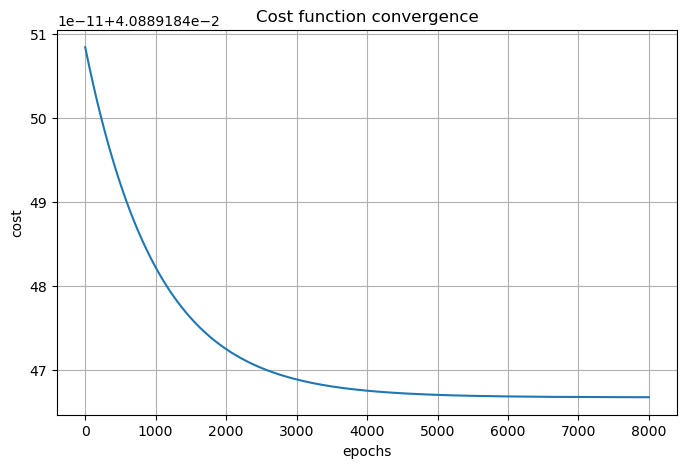

In [118]:
# Plotting epochs vs cost function
plt.figure(figsize=(8,5))
plt.plot(range(epochs), costs)
plt.title('Cost function convergence')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid(True)
plt.show()

Slope = 0.118
Intercept = 0.444


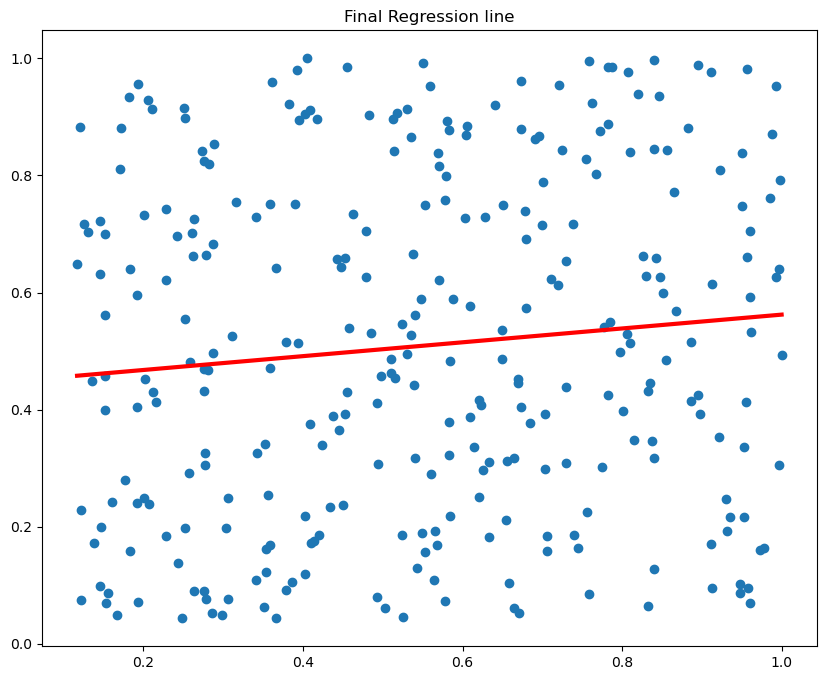

In [138]:
# The actual regression line
plt.figure(figsize=(10,8))

line_x = np.linspace(min(X[:, 1]), max(X[:, 1]), 300)
line_y = theta[0].item() + theta[1].item() * line_x

plt.scatter(X[:, 1], y)
plt.plot(line_x, line_y, color='red', linewidth=3)
plt.title('Final Regression line')

slope = (line_y[1] - line_y[0])/(line_x[1] - line_x[0])
print(f'Slope = {slope:.03f}')
print(f'Intercept = {theta[0].item():.3f}')

plt.show()